<h2><a href="https://leetcode.com/problems/redundant-connection">684. Redundant Connection</a></h2><h3>Medium</h3><hr><p>In this problem, a tree is an <strong>undirected graph</strong> that is connected and has no cycles.</p>

<p>You are given a graph that started as a tree with <code>n</code> nodes labeled from <code>1</code> to <code>n</code>, with one additional edge added. The added edge has two <strong>different</strong> vertices chosen from <code>1</code> to <code>n</code>, and was not an edge that already existed. The graph is represented as an array <code>edges</code> of length <code>n</code> where <code>edges[i] = [a<sub>i</sub>, b<sub>i</sub>]</code> indicates that there is an edge between nodes <code>a<sub>i</sub></code> and <code>b<sub>i</sub></code> in the graph.</p>

<p>Return <em>an edge that can be removed so that the resulting graph is a tree of </em><code>n</code><em> nodes</em>. If there are multiple answers, return the answer that occurs last in the input.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2021/05/02/reduntant1-1-graph.jpg" style="width: 222px; height: 222px;" />
<pre>
<strong>Input:</strong> edges = [[1,2],[1,3],[2,3]]
<strong>Output:</strong> [2,3]
</pre>

<p><strong class="example">Example 2:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2021/05/02/reduntant1-2-graph.jpg" style="width: 382px; height: 222px;" />
<pre>
<strong>Input:</strong> edges = [[1,2],[2,3],[3,4],[1,4],[1,5]]
<strong>Output:</strong> [1,4]
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>n == edges.length</code></li>
	<li><code>3 &lt;= n &lt;= 1000</code></li>
	<li><code>edges[i].length == 2</code></li>
	<li><code>1 &lt;= a<sub>i</sub> &lt; b<sub>i</sub> &lt;= edges.length</code></li>
	<li><code>a<sub>i</sub> != b<sub>i</sub></code></li>
	<li>There are no repeated edges.</li>
	<li>The given graph is connected.</li>
</ul>


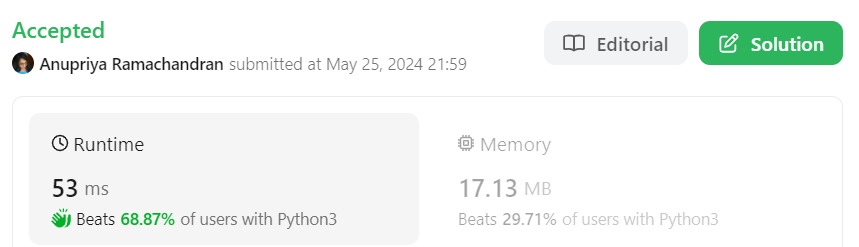

In [2]:
from collections import defaultdict, deque
from typing import List

class Solution:
    def findRedundantConnection(self, edges: List[List[int]]) -> List[int]:
        # If we find an edge which connects two nodes , which were already connected , 
        # then we will get an edge which will form a cycle
        
        graph = defaultdict(list)
        # Lets start by constructing graph,see the 2 nodes we get is already connected or not
        # if not connected we will add the edges for the node in our graph
        for a, b in edges:
            if self.isalreadyconnected(graph, a, b):
                return [a, b]
            else:
                graph[a].append(b)
                graph[b].append(a)

        return None # since one of the constraints states : The given graph is connected.,
                    #  so we dont have to care about the else case 

    #  what we can do is, we will traverse through neighbours of node A, 
    # these neighbours are the ones before adding the edge for a, b so technically if 
    # there is no cyle , then it should not exist
    # and try to see we reach b, if we do, then its connected else not connected
    def isalreadyconnected(self, graph, a, b):
        visited = set()
        queue = deque([a])
        
        while queue:
            node = queue.popleft()
            if node == b:  # check if node obtained from q is b
                return True
            
            # add the node to visited to avoid visiting the already visited node
            visited.add(node)

            for neighbour in graph[node]:
                if neighbour not in visited:
                    queue.append(neighbour)
        
        # if after checking out all the neighbouring nodes ,
        #  we dont find node:b then return False
        return False

### DFS Traversal   : But BFS is faster than DFS , because we may not need to go till the depth
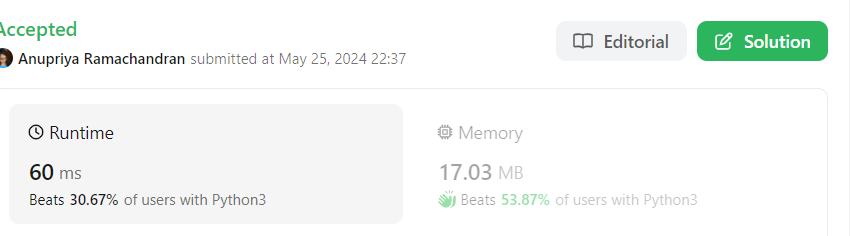

In [3]:
from collections import defaultdict, deque
class Solution:
    def findRedundantConnection(self, edges: List[List[int]]) -> List[int]:       
        graph = defaultdict(list)

        # Logic exactly same as bfs , but bfs replaced with dfs traversal
        for a, b in edges:
            visited = set()  # we make a fresh visited because we call dfs for every pair of edges
            if self.isalreadyconnected(graph, visited, a, b):
                return [a, b]
            else:
                graph[a].append(b)
                graph[b].append(a)

        return None # since one of the constraints states : The given graph is connected.,
                    #  so we dont have to care about the else case  

    # dfs function to check if path exists between nodes a and b
    def isalreadyconnected(self, graph, visited, a, b):
        if a == b:
            return True

        # mark u as visited
        visited.add(a)

        # iterate through all the neighbors of u and if they are not visited call dfs on them
        for neighbour in graph[a]:
            if neighbour not in visited:

                # we have to reach b, so parent will be neigbour and child will be b
                if self.isalreadyconnected(graph, visited, neighbour, b):
                    return True
        return False